In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values
print('data dimensions', X.shape)

data dimensions (569, 30)


In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

first_row = X_test[0]
print("predicition: ", rf.predict([first_row]))
print("true value: ", y_test[0])

print("random forest accuracy:", rf.score(X_test, y_test))

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Decision tree accuracy:", dt.score(X_test, y_test))

predicition:  [1]
true value:  1
random forest accuracy: 0.9790209790209791
Decision tree accuracy: 0.9090909090909091


In [3]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

param_grid = {'n_estimators': [10, 25, 50, 75, 100],}
rf = RandomForestClassifier(random_state=101)
gs = GridSearchCV(rf, param_grid, cv=5)

gs.fit(X,y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 100}


In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

param_grid = {'n_estimators': [10, 25, 50, 75, 100],}
rf = RandomForestClassifier(random_state=123)
gs = GridSearchCV(rf, param_grid, scoring='f1', cv=5)

gs.fit(X,y)
print("best params:", gs.best_params_)

best params: {'n_estimators': 25}


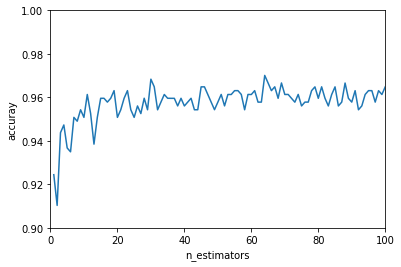

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X,y)
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X,y)
scores = gs.cv_results_['mean_test_score']

plt.plot(n_estimators, scores)
plt.xlabel('n_estimators')
plt.ylabel('accuray')
plt.xlim(0,100)
plt.ylim(0.9, 1)
plt.show()

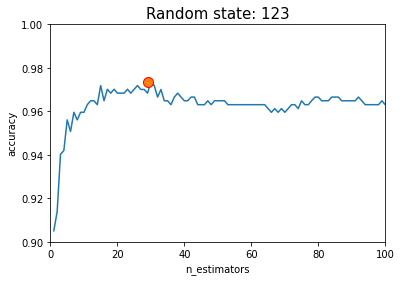

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


cancer_data=load_breast_cancer()
df=pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
df['target']=cancer_data['target']
X=df[cancer_data.feature_names]
y=cancer_data['target']

n_estimators=list(range(1,101))
params_grid={
    'n_estimators': n_estimators,
    }
rnd_state=123
rf=RandomForestClassifier(random_state=rnd_state)
gs=GridSearchCV(rf,params_grid,cv=5)
gs.fit(X,y)
 #collect max datapoints
max_scores=[]
scores=gs.cv_results_['mean_test_score'].round(4)
max_score=np.max(scores)

max_scores=[m for m in range(len(scores)) if scores[m] == max_score]

#Graph Info
title='Random state: '+ str(rnd_state)
plt.plot(n_estimators,scores)
plt.title(title,size=15)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.9,1.0)
plt.plot([max_scores],[max_score],
        marker='o',
        markersize=10,
        markerfacecolor=None,
        markeredgecolor='r')
plt.show()

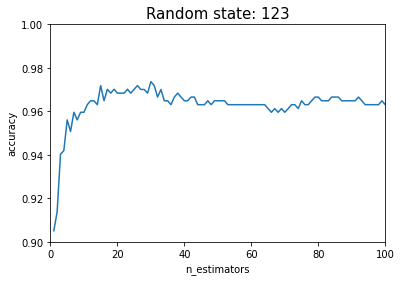

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


cancer_data=load_breast_cancer()
df=pd.DataFrame(cancer_data['data'],columns=cancer_data['feature_names'])
df['target']=cancer_data['target']
X=df[cancer_data.feature_names]
y=cancer_data['target']

n_estimators=list(range(1,101))
params_grid={
    'n_estimators': n_estimators,
    }
rnd_state=123
rf=RandomForestClassifier(random_state=rnd_state)
gs=GridSearchCV(rf,params_grid,cv=5)
gs.fit(X,y)
 #collect max datapoints
scores=gs.cv_results_['mean_test_score'].round(4)

#Graph Info
title='Random state: '+ str(rnd_state)
plt.plot(n_estimators,scores)
plt.title(title,size=15)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xlim(0,100)
plt.ylim(0.9,1.0)
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

ft_imp = pd.Series(rf.feature_importances_,
                  index = cancer_data.feature_names).sort_values(ascending=False)
ft_imp.head(10)

worst radius            0.309701
mean concave points     0.183126
worst concave points    0.115641
mean perimeter          0.064119
mean radius             0.058742
worst concavity         0.050951
radius error            0.049103
mean texture            0.017197
worst area              0.016512
mean concavity          0.014696
dtype: float64

In [10]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.965034965034965

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


In [12]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data['data'],
columns = cancer_data['feature_names'])
df['target'] = cancer_data['target']

X = df[cancer_data.feature_names].values
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

n_estimators = list(range(1, 101))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(n_estimators=10, random_state=111)
rf.fit(X_train, y_train)

worst_cols = [col for col in df.columns if 'worst' in col]
print(worst_cols)

X_worst = df[worst_cols]
X_train, X_test, y_train, y_test = train_test_split(X_worst, y, random_state=101)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


0.972027972027972

In [15]:
from sklearn.datasets import make_circles
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np

X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
kf = KFold(n_splits=5, shuffle=True, random_state=1)

lr_scores=[]
rf_scores=[]

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    lr = LogisticRegression(solver='lbfgs')
    lr.fit(X_train, y_train)
    lr_scores.append(lr.score(X_test, y_test))
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X_train, y_train)
    rf_scores.append(rf.score(X_test, y_test))
print("LR accuracy: ", np.mean(lr_scores))
print("RF accuracy: ", np.mean(rf_scores))

LR accuracy:  0.36
RF accuracy:  0.8400000000000001


In [ ]:
#project

import numpy as np
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

random_state = int(input())
n = int(input())
rows = []
for i in range(n):
    rows.append([float(a) for a in input().split()])

X = np.array(rows)
y = np.array([int(a) for a in input().split()])

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=random_state)

rf = RandomForestClassifier(n_estimators=5,random_state=random_state)
rf.fit(X_train,y_train)

print(rf.predict(X_test))